In [1]:
%run -i ../functions/load_packages.ipynb

metrics = "../../pypsa-earth-sec/results/GADM14/csvs/metrics.csv"

In [57]:
df = pd.read_csv(metrics, keep_default_na=False,
        na_values=[""])


In [97]:
df1=df.set_index('cluster')
df2 = df1.loc[['export', 'total costs']]
df2 = df2.apply(pd.to_numeric)
df2

,30,30.1,30.2,30.3
cluster,,,,
export,0.000000e+00,1.000000e+01,5.000000e+01,5.380000e+02
total costs,2.061656e+09,2.443749e+09,5.119557e+09,4.428450e+10


In [109]:
df3 = [0]
for column in df2.columns[1:]:
    df3.append((df2.loc["total costs",column].astype(float)- df2.loc["total costs", "30"].astype(float)) / (df2.loc["export", column] * (1e+09/33.33)))
df3 = pd.DataFrame(df3).transpose()
#df3 = df3.rename(columns={'0':'30', '1':'30.1', '2':'30.2', '3':'30.3'})
df3.columns = ['30', '30.1', '30.2', '30.3']
df3

,30,30.1,30.2,30.3
0,0.0,1.273518,2.038397,2.615776


In [125]:
#df2 = df2.append(df3, ignore_index=True)
df4 = pd.concat([df2, df3], axis=0)
df4.T.columns

Index(['export', 'total costs', 0], dtype='object')

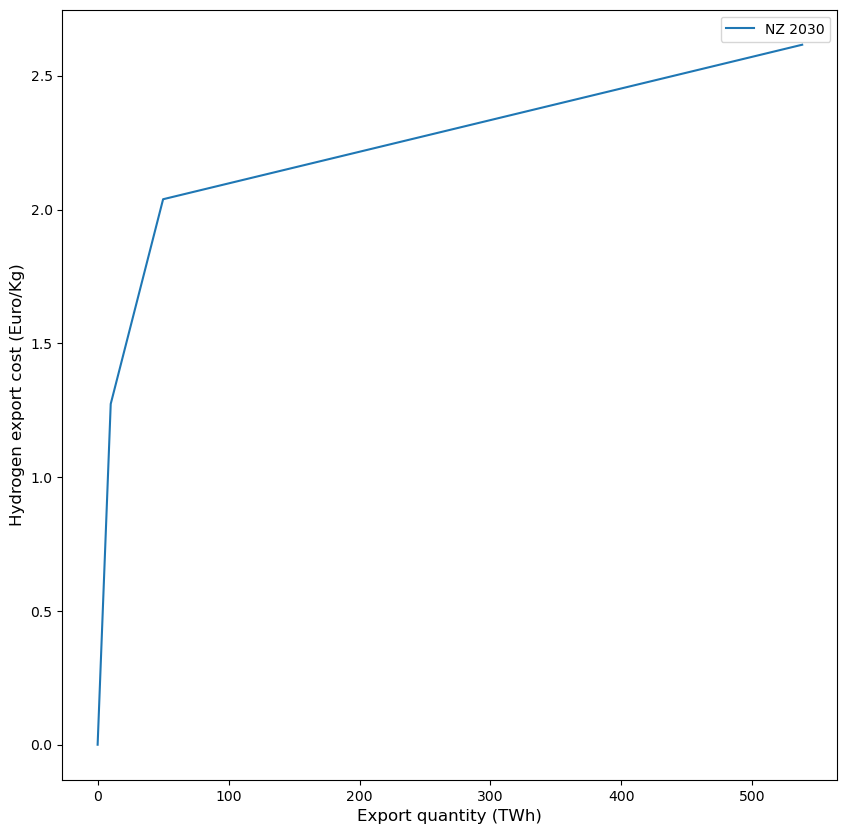

In [135]:
# create figure and axis
fig, ax = plt.subplots(figsize=(10, 10))
# transposing (switchung rows and columns) of DataFrame df and
# plot a line for each column on the axis ax, which was created previously
df4.T.plot(ax=ax, x='export', y=0)
# setting the axis' labels
ax.set_ylabel('Hydrogen export cost (Euro/Kg)',fontsize=12)
ax.set_xlabel('Export quantity (TWh)',fontsize=12)
ax.legend(["NZ 2030"]);
